# AAIC Self Case Study Title: <br>

# <font color='deep blue'>“Airbnb new users’ bookings”- Where will a new guest book their first travel experience.</font>

-------------

# ML Model with approach 1 of pre-processing of data

In [1]:
#importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ndcg_score
from xgboost import XGBClassifier
from tqdm import tqdm
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
import optuna
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from prettytable import PrettyTable
from sklearn.preprocessing import OneHotEncoder
import pickle

In [40]:
#reading the clean data by approach 2
df_2=pd.read_csv("approach_2_df.csv")
df_2.head(10)

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,unique_action,unique_action_type,unique_action_detail,unique_device,secs_elapsed_sum,secs_elapsed_mean,secs_elapsed_max,secs_elapsed_std,secs_elapsed_median,device_type
0,gxn3p5htnn,2010-06-28,2.009030e+13,FEMALE,28.0,facebook,0,en,direct,direct,...,14.0,6.0,12.0,1.0,777750.0,24149.0,446480.0,100438.0,853.0,iPhone
1,820tgsjxq7,2011-05-25,2.009050e+13,MALE,38.0,facebook,0,en,seo,google,...,14.0,5.0,11.0,1.0,1031295.0,19175.0,154136.0,94434.0,743.0,Mac Desktop
2,4ft3gnwmtx,2010-09-28,2.009060e+13,FEMALE,56.0,basic,3,en,direct,direct,...,15.0,5.0,12.0,1.0,506985.0,15769.0,578931.0,51734.0,1317.0,Mac Desktop
3,bjjt8pjhuk,2011-12-05,2.009100e+13,FEMALE,42.0,facebook,0,en,direct,direct,...,12.0,5.0,12.0,1.0,1972131.0,21414.0,519158.0,102379.0,1768.0,iPhone
4,87mebub9p4,2010-09-14,2.009120e+13,FEMALE,41.0,basic,0,en,direct,direct,...,8.0,5.0,10.0,1.0,492895.0,18744.0,184729.0,73142.0,757.0,Windows Desktop
5,osr2jwljor,2010-01-01,2.010010e+13,MALE,42.0,basic,0,en,other,other,...,12.0,6.0,13.0,1.0,487611.0,29823.0,402939.0,104875.0,1648.0,Mac Desktop
6,lsw9q7uk0j,2010-01-02,2.010010e+13,FEMALE,46.0,basic,0,en,other,craigslist,...,9.0,5.0,10.0,1.0,869522.0,12580.0,613351.0,32779.0,1151.0,Mac Desktop
7,0d01nltbrs,2010-01-03,2.010010e+13,FEMALE,47.0,basic,0,en,direct,direct,...,13.0,5.0,12.0,1.0,1604568.0,32159.0,282770.0,55961.0,1095.0,iPhone
8,a1vcnhxeij,2010-01-04,2.010010e+13,FEMALE,50.0,basic,0,en,other,craigslist,...,15.0,6.0,10.0,1.0,438880.0,28930.0,316393.0,38063.0,1315.0,Mac Desktop
9,6uh8zyj2gn,2010-01-04,2.010010e+13,FEMALE,46.0,basic,0,en,other,craigslist,...,15.0,6.0,10.0,1.0,959949.0,13982.0,332848.0,29838.0,1482.0,Mac Desktop


In [3]:
print("shape:",df_2.shape)
df_2.tail(10)

shape: (213451, 33)


,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,...,unique_action,unique_action_type,unique_action_detail,unique_device,secs_elapsed_sum,secs_elapsed_mean,secs_elapsed_max,secs_elapsed_std,secs_elapsed_median,device_type
213441,omlc9iku7t,2014-06-30,2.014060e+13,FEMALE,34.0,basic,0,en,direct,direct,...,13.0,6.0,11.0,2.0,526082.0,16440.062500,361277.0,63665.550782,702.5,Mac Desktop
213442,rf0ay567js,2014-06-30,2.014060e+13,FEMALE,38.0,basic,0,en,sem-brand,google,...,16.0,6.0,17.0,1.0,2548293.0,23815.822430,526492.0,80762.161662,525.0,Mac Desktop
213443,0k26r3mir0,2014-06-30,2.014060e+13,FEMALE,36.0,basic,0,en,sem-brand,google,...,19.0,7.0,15.0,1.0,5103822.0,38374.601504,1372002.0,189382.317877,811.0,Mac Desktop
213444,40o1ivh6cb,2014-06-30,2.014060e+13,FEMALE,28.0,basic,0,en,direct,direct,...,6.0,3.0,6.0,1.0,315712.0,21047.466667,214903.0,54665.829180,4111.0,Windows Desktop
213445,qbxza0xojf,2014-06-30,2.014060e+13,FEMALE,23.0,basic,0,en,sem-brand,google,...,13.0,6.0,11.0,1.0,1459801.0,14036.548077,443844.0,48349.318666,1244.5,Windows Desktop
213446,zxodksqpep,2014-06-30,2.014060e+13,MALE,32.0,basic,0,en,sem-brand,google,...,37.0,7.0,24.0,2.0,5141396.0,46739.963636,1445590.0,166237.234458,1686.5,iPhone
213447,mhewnxesx9,2014-06-30,2.014060e+13,FEMALE,38.0,basic,0,en,direct,direct,...,25.0,7.0,22.0,3.0,2878924.0,12096.319328,748658.0,60030.505588,563.0,iPhone
213448,6o3arsjbb4,2014-06-30,2.014060e+13,FEMALE,32.0,basic,0,en,direct,direct,...,10.0,5.0,11.0,1.0,342982.0,19054.555556,149128.0,42591.771128,1278.5,Mac Desktop
213449,jh95kwisub,2014-06-30,2.014060e+13,MALE,28.0,basic,25,en,other,other,...,8.0,6.0,9.0,1.0,341609.0,4554.786667,66636.0,8925.899713,2272.0,iPhone
213450,nw9fwlyb5f,2014-06-30,2.014060e+13,FEMALE,39.0,basic,25,en,direct,direct,...,13.0,6.0,13.0,1.0,2759210.0,67297.804878,1679278.0,273429.620491,375.0,iPhone


In [4]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 33 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  float64
 3   gender                   213451 non-null  object 
 4   age                      213451 non-null  float64
 5   signup_method            213451 non-null  object 
 6   signup_flow              213451 non-null  int64  
 7   language                 213451 non-null  object 
 8   affiliate_channel        213451 non-null  object 
 9   affiliate_provider       213451 non-null  object 
 10  first_affiliate_tracked  213451 non-null  object 
 11  signup_app               213451 non-null  object 
 12  first_device_type        213451 non-null  object 
 13  first_browser            213451 non-null  object 
 14  coun

In [30]:
categorical_cols=['gender','signup_method','language','affiliate_channel','affiliate_provider','first_affiliate_tracked',\
                 'signup_app','first_device_type','first_browser','action_row','device_type']

to_drop=['id','date_account_created','timestamp_first_active','date_first_active']

### encoding the categorical columns

In [7]:
cols=df_2.columns

In [41]:
df_2=df_2.sort_values(by='date_account_created')

In [42]:
le=LabelEncoder()
df_2.country_destination=le.fit_transform(df_2.country_destination)
print("unique encoded labels for destination countries:",sorted(df_2.country_destination.unique()))
print("--"*30)
for i in le.classes_:
    print(i,"--:--",le.transform([i]))

unique encoded labels for destination countries: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
------------------------------------------------------------
AU --:-- [0]
CA --:-- [1]
DE --:-- [2]
ES --:-- [3]
FR --:-- [4]
GB --:-- [5]
IT --:-- [6]
NDF --:-- [7]
NL --:-- [8]
PT --:-- [9]
US --:-- [10]
other --:-- [11]


In [43]:
with open('label_encoder','wb') as f:
    pickle.dump(le,f)

In [44]:
cat_df=df_2[categorical_cols]

In [45]:
cat_df

,gender,signup_method,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,action_row,device_type
5,MALE,basic,en,other,other,omg,Web,Mac Desktop,Chrome,verify -unknown- -unknown-,Mac Desktop
6,FEMALE,basic,en,other,craigslist,untracked,Web,Mac Desktop,Safari,social_connections data user_social_connections,Mac Desktop
7,FEMALE,basic,en,direct,direct,omg,Web,Mac Desktop,Safari,verify -unknown- -unknown-,iPhone
9,FEMALE,basic,en,other,craigslist,omg,Web,Mac Desktop,Firefox,show -unknown- -unknown-,Mac Desktop
8,FEMALE,basic,en,other,craigslist,untracked,Web,Mac Desktop,Safari,update submit update_listing,Mac Desktop
...,...,...,...,...,...,...,...,...,...,...,...
213058,MALE,basic,en,direct,direct,linked,Web,Windows Desktop,Chrome,show view p1,Windows Desktop
213059,FEMALE,basic,en,seo,google,linked,Web,Mac Desktop,Chrome,similar_listings_v2 NULL NULL,Mac Desktop
213060,MALE,basic,en,direct,direct,untracked,Web,Mac Desktop,Chrome,similar_listings data similar_listings,Mac Desktop
213044,FEMALE,facebook,en,direct,direct,linked,Web,Mac Desktop,Safari,verify -unknown- -unknown-,Mac Desktop


In [46]:
df_2.drop(categorical_cols,axis=1,inplace=True)
df_2.drop(to_drop,axis=1,inplace=True)
y=df_2.country_destination.values
df_2.drop(['country_destination'],axis=1,inplace=True)

In [47]:
df_2

,age,signup_flow,month,weekday,waiting_days,1st_active_month,1st_active_weekday,count_action,unique_action,unique_action_type,unique_action_detail,unique_device,secs_elapsed_sum,secs_elapsed_mean,secs_elapsed_max,secs_elapsed_std,secs_elapsed_median
5,42.0,0,1,4,0.0,1,4,37.0,12.0,6.0,13.0,1.0,487611.0,29823.000000,402939.0,104875.000000,1648.0
6,46.0,0,1,5,1.0,1,4,85.0,9.0,5.0,10.0,1.0,869522.0,12580.000000,613351.0,32779.000000,1151.0
7,47.0,0,1,6,2.0,1,4,88.0,13.0,5.0,12.0,1.0,1604568.0,32159.000000,282770.0,55961.000000,1095.0
9,46.0,0,1,0,3.0,1,4,24.0,15.0,6.0,10.0,1.0,959949.0,13982.000000,332848.0,29838.000000,1482.0
8,50.0,0,1,0,3.0,1,4,14.0,15.0,6.0,10.0,1.0,438880.0,28930.000000,316393.0,38063.000000,1315.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213058,19.0,0,6,0,29.0,6,6,3.0,3.0,3.0,3.0,1.0,776.0,258.666667,492.0,246.976382,284.0
213059,41.0,0,6,0,29.0,6,6,168.0,12.0,6.0,12.0,1.0,1421822.0,8463.226190,111849.0,16767.065122,1711.0
213060,22.0,0,6,0,29.0,6,6,59.0,12.0,6.0,10.0,1.0,1207169.0,20460.491525,303776.0,49810.260740,1115.0
213044,30.0,0,6,0,29.0,6,6,27.0,18.0,7.0,15.0,1.0,691295.0,25603.518519,326295.0,67470.015128,4256.0


In [48]:
ohe=OneHotEncoder(sparse=False,handle_unknown='ignore')
encoded_df=ohe.fit_transform(cat_df)

print("shape of encoded df:",encoded_df.shape)
encoded_df

shape of encoded df: (213451, 329)


array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

In [49]:
with open("one_hot_encoder", "wb") as f: 
    pickle.dump(ohe, f)

In [21]:
X=np.hstack((np.array(df_2),encoded_df))

print("X shape:",X.shape)
X

X shape: (213451, 346)


array([[42.,  0.,  1., ...,  0.,  0.,  0.],
       [46.,  0.,  1., ...,  0.,  0.,  0.],
       [47.,  0.,  1., ...,  0.,  1.,  0.],
       ...,
       [22.,  0.,  6., ...,  0.,  0.,  0.],
       [30.,  0.,  6., ...,  0.,  0.,  0.],
       [39., 25.,  6., ...,  0.,  1.,  0.]])

#### Encoding the categorical columns for test dataset

In [8]:
total=pd.concat([test_df,df_2.drop('country_destination',axis=1)],ignore_index=False)
total.shape

(275547, 32)

In [9]:
#encoding for the test dataset

encoded_test_df=pd.get_dummies(total,columns=categorical_cols)
encoded_test_df=encoded_test_df[:len(test_df)]  #extracting just the test data

cols_to_drop=[]

for i in encoded_test_df.columns:
    if i not in encoded_df.columns:
        cols_to_drop.append(i)

#dropping the columns which are not there in the train dataset to avoid data leakage
encoded_test_df.drop(cols_to_drop,axis=1,inplace=True)

print("shape of encoded data:",encoded_test_df.shape)
encoded_test_df

shape of encoded data: (62096, 350)


,id,date_account_created,timestamp_first_active,age,signup_flow,month,weekday,date_first_active,waiting_days,1st_active_month,...,device_type_Chromebook,device_type_Linux Desktop,device_type_Mac Desktop,device_type_Opera Phone,device_type_Tablet,device_type_Windows Desktop,device_type_Windows Phone,device_type_iPad Tablet,device_type_iPhone,device_type_iPodtouch
0,5uwns89zht,2014-07-01,2.014070e+13,35.0,0,7,1,2014-07-01,0.0,7,...,0,0,0,0,0,0,0,0,1,0
1,jtl0dijy2j,2014-07-01,2.014070e+13,33.0,0,7,1,2014-07-01,0.0,7,...,0,0,0,0,0,0,0,0,1,0
2,xx0ulgorjt,2014-07-01,2.014070e+13,40.0,0,7,1,2014-07-01,0.0,7,...,0,0,0,0,0,1,0,0,0,0
3,6c6puo6ix0,2014-07-01,2.014070e+13,33.0,0,7,1,2014-07-01,0.0,7,...,0,0,0,0,0,1,0,0,0,0
4,czqhjk3yfe,2014-07-01,2.014070e+13,30.0,0,7,1,2014-07-01,0.0,7,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62091,cv0na2lf5a,2014-09-30,2.014093e+13,31.0,0,9,1,2014-09-01,29.0,9,...,0,0,0,0,0,0,0,0,1,0
62092,zp8xfonng8,2014-09-30,2.014093e+13,38.0,23,9,1,2014-09-01,29.0,9,...,0,0,0,0,0,0,0,0,0,0
62093,fa6260ziny,2014-09-30,2.014093e+13,38.0,0,9,1,2014-09-01,29.0,9,...,0,0,0,0,0,1,0,0,0,0
62094,87k0fy4ugm,2014-09-30,2.014093e+13,42.0,0,9,1,2014-09-01,29.0,9,...,0,0,0,0,0,0,0,0,1,0


### Label encoding the country destinations

In [10]:
le=LabelEncoder()
encoded_df.country_destination=le.fit_transform(encoded_df.country_destination)
print("unique encoded labels for destination countries:",sorted(encoded_df.country_destination.unique()))
print("--"*30)
for i in le.classes_:
    print(i,"--:--",le.transform([i]))

unique encoded labels for destination countries: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
------------------------------------------------------------
AU --:-- [0]
CA --:-- [1]
DE --:-- [2]
ES --:-- [3]
FR --:-- [4]
GB --:-- [5]
IT --:-- [6]
NDF --:-- [7]
NL --:-- [8]
PT --:-- [9]
US --:-- [10]
other --:-- [11]


In [11]:
#sorting the train dataset by date_account_created so that oldest is in train data and newest is in test data in train_test_split
encoded_df=encoded_df.sort_values(by='date_account_created')
encoded_df.head(20)

,id,date_account_created,timestamp_first_active,age,signup_flow,country_destination,month,weekday,date_first_active,waiting_days,...,device_type_Chromebook,device_type_Linux Desktop,device_type_Mac Desktop,device_type_Opera Phone,device_type_Tablet,device_type_Windows Desktop,device_type_Windows Phone,device_type_iPad Tablet,device_type_iPhone,device_type_iPodtouch
5,osr2jwljor,2010-01-01,2.010010e+13,42.0,0,10,1,4,2010-01-01,0.0,...,0,0,1,0,0,0,0,0,0,0
6,lsw9q7uk0j,2010-01-02,2.010010e+13,46.0,0,10,1,5,2010-01-01,1.0,...,0,0,1,0,0,0,0,0,0,0
7,0d01nltbrs,2010-01-03,2.010010e+13,47.0,0,10,1,6,2010-01-01,2.0,...,0,0,0,0,0,0,0,0,1,0
9,6uh8zyj2gn,2010-01-04,2.010010e+13,46.0,0,10,1,0,2010-01-01,3.0,...,0,0,1,0,0,0,0,0,0,0
8,a1vcnhxeij,2010-01-04,2.010010e+13,50.0,0,10,1,0,2010-01-01,3.0,...,0,0,1,0,0,0,0,0,0,0
10,yuuqmid2rp,2010-01-04,2.010010e+13,36.0,0,10,1,0,2010-01-01,3.0,...,0,0,1,0,0,0,0,0,0,0
13,dy3rgx56cu,2010-01-05,2.010010e+13,37.0,0,7,1,1,2010-01-01,4.0,...,0,0,1,0,0,0,0,0,0,0
11,om1ss59ys8,2010-01-05,2.010010e+13,47.0,0,7,1,1,2010-01-01,4.0,...,0,0,1,0,0,0,0,0,0,0
12,k6np330cm1,2010-01-05,2.010010e+13,41.0,0,4,1,1,2010-01-01,4.0,...,0,0,1,0,0,0,0,0,0,0
16,2dwbwkx056,2010-01-07,2.010010e+13,41.0,0,7,1,3,2010-01-01,6.0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
#dropping the unnecessary columns
encoded_df.drop(to_drop,axis=1,inplace=True)

In [13]:
#dropping the unnecessary columns from the given test dataset
encoded_test_df.drop(to_drop,axis=1,inplace=True)

In [14]:
encoded_df

,age,signup_flow,country_destination,month,weekday,waiting_days,1st_active_month,1st_active_weekday,count_action,unique_action,...,device_type_Chromebook,device_type_Linux Desktop,device_type_Mac Desktop,device_type_Opera Phone,device_type_Tablet,device_type_Windows Desktop,device_type_Windows Phone,device_type_iPad Tablet,device_type_iPhone,device_type_iPodtouch
5,42.0,0,10,1,4,0.0,1,4,37.0,12.0,...,0,0,1,0,0,0,0,0,0,0
6,46.0,0,10,1,5,1.0,1,4,85.0,9.0,...,0,0,1,0,0,0,0,0,0,0
7,47.0,0,10,1,6,2.0,1,4,88.0,13.0,...,0,0,0,0,0,0,0,0,1,0
9,46.0,0,10,1,0,3.0,1,4,24.0,15.0,...,0,0,1,0,0,0,0,0,0,0
8,50.0,0,10,1,0,3.0,1,4,14.0,15.0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213058,19.0,0,10,6,0,29.0,6,6,3.0,3.0,...,0,0,0,0,0,1,0,0,0,0
213059,41.0,0,7,6,0,29.0,6,6,168.0,12.0,...,0,0,1,0,0,0,0,0,0,0
213060,22.0,0,10,6,0,29.0,6,6,59.0,12.0,...,0,0,1,0,0,0,0,0,0,0
213044,30.0,0,10,6,0,29.0,6,6,27.0,18.0,...,0,0,1,0,0,0,0,0,0,0


#### Separating the target and feature matrix

In [15]:
y=encoded_df.country_destination
X=encoded_df.drop('country_destination',axis=1)

In [ ]:
##############################################################################################

### Train test split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,shuffle=False)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)

X_train shape: (149415, 346)
X_test shape: (64036, 346)


#### Standardising the datasets

In [24]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [26]:
with open("standard_scaler", "wb") as f: 
    pickle.dump(sc, f)

In [20]:
#Standardising the given test dataset
test=sc.transform(encoded_test_df)

### Function for confusion, precision and recall matrices

In [35]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    
    B =(C/C.sum(axis=0))
    
    labels = [0,1,2,3,4,5,6,7,8,9,10,11]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

### Getting the log-loss value of a Random Model

Log loss on Test Data using Random Model 2.778169149074956
-------------------- Confusion matrix --------------------


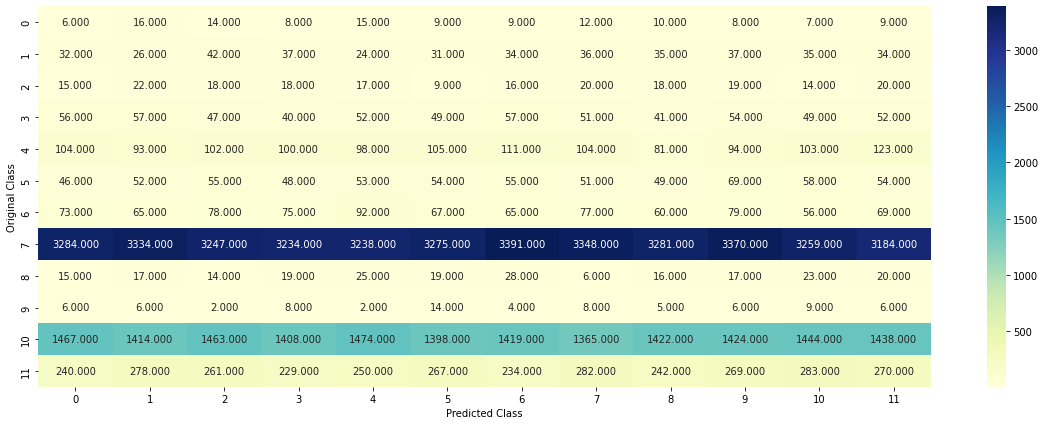

-------------------- Precision matrix (Columm Sum=1) --------------------


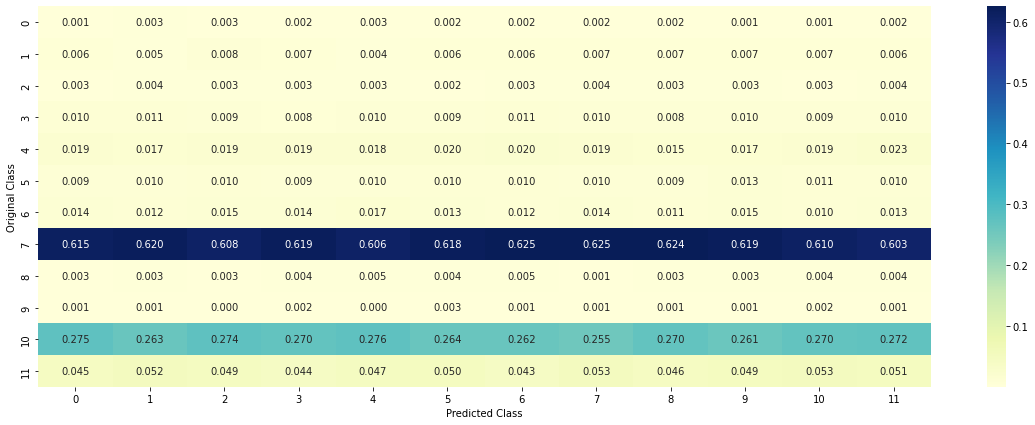

-------------------- Recall matrix (Row sum=1) --------------------


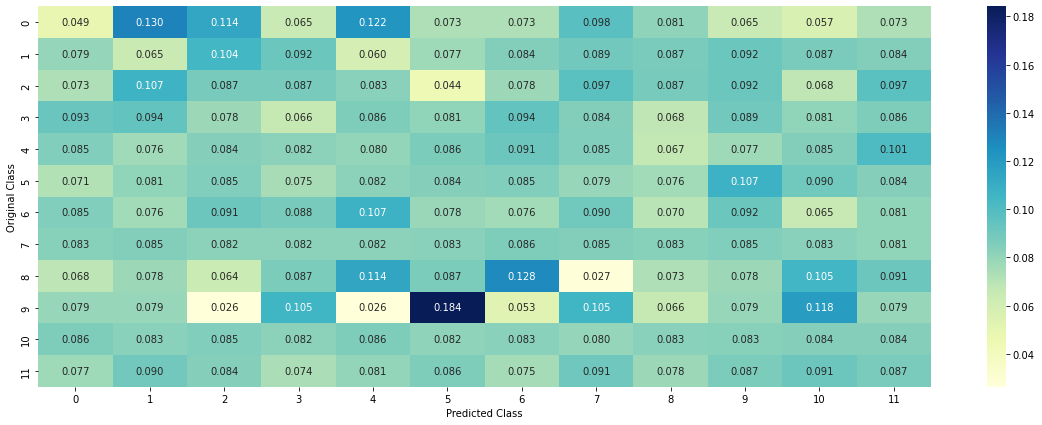

In [22]:
test_data_len = X_test.shape[0]

# we create a output array that has exactly same size as the CV data
test_predicted_y = np.zeros((test_data_len,12))
for i in range(test_data_len):
    rand_probs = np.random.rand(1,12)
    test_predicted_y[i] = rand_probs/rand_probs[0].sum()
print("Log loss on Test Data using Random Model",log_loss(y_test,test_predicted_y, eps=1e-15))


predicted_y =np.argmax(test_predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

#### Comment: Thus any better model should produce a log-loss of less than 2.773 else if it is more, then it would be worse than a random model.

#### Train-cv-test split

In [23]:
X_train,X_cv,y_train,y_cv=train_test_split(X_train,y_train,test_size=0.3,shuffle=False)

print("train shape:",X_train.shape)
print("cv shape:",X_cv.shape)
print("test shape:",X_test.shape)

train shape: (104590, 346)
cv shape: (44825, 346)
test shape: (64036, 346)


#### Encoding the class labels for calculating NDCG scores

In [24]:
encoded_y_test=np.zeros((len(y_test.values),12))
encoded_y_test.shape

c=0
for i in y_test.values:
    encoded_y_test[c][i]=1
    c+=1
    
print("The class for 1st test datapoint:",y_test.values[0])
print("The corresponding encoded class:",encoded_y_test[0])

The class for 1st test datapoint: 11
The corresponding encoded class: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


# ML Models

## Logistic regression without class balancing

for alpha = 0.01
Log Loss : 1.0656945832736249
for alpha = 0.1
Log Loss : 1.0649606563286136
for alpha = 1
Log Loss : 1.0710617676044434
for alpha = 10
Log Loss : 1.0750816876751794
for alpha = 20
Log Loss : 1.0746732015852816
for alpha = 30
Log Loss : 1.0755621213449549


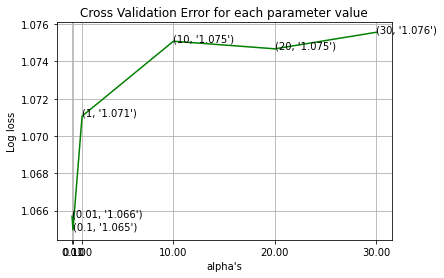

For values of best alpha =  0.1 The train log loss is: 1.2144456212624946
For values of best alpha =  0.1 The cross validation log loss is: 1.0646770313521816
For values of best alpha =  0.1 The test log loss is: 1.1136844646829664


In [25]:
alpha = [0.01, 0.1, 1, 10, 20, 30]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i,loss='log')
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.xticks(alpha)
plt.title("Cross Validation Error for each parameter value")
plt.xlabel("alpha's")
plt.ylabel("Log loss")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
lr_clf = SGDClassifier(alpha=alpha[best_alpha],loss='log')
lr_clf.fit(X_train, y_train)
lr_sig_clf = CalibratedClassifierCV(lr_clf, method="sigmoid")
lr_sig_clf.fit(X_train, y_train)


predict_y = lr_sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = lr_sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = lr_sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


Micro f1 score: 0.616
Macro f1 score: 0.064
NDCG score: 0.8223277871561004
-------------------- Confusion matrix --------------------


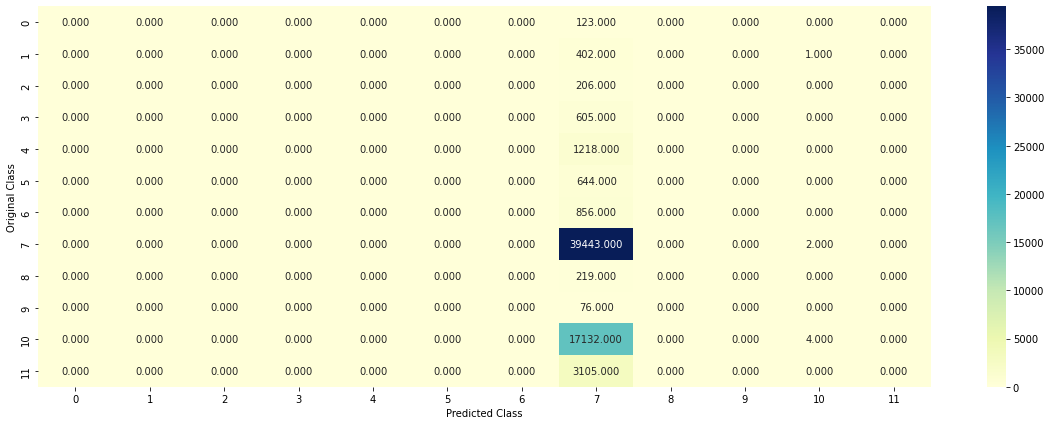

-------------------- Precision matrix (Columm Sum=1) --------------------


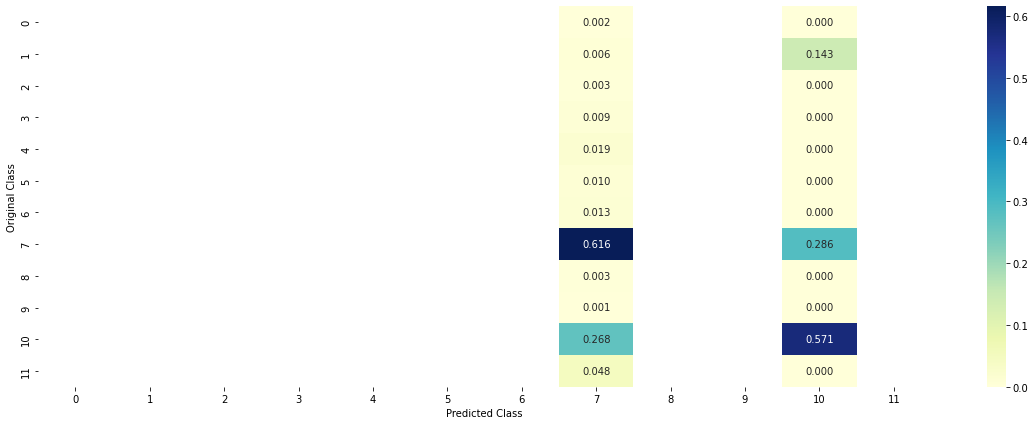

-------------------- Recall matrix (Row sum=1) --------------------


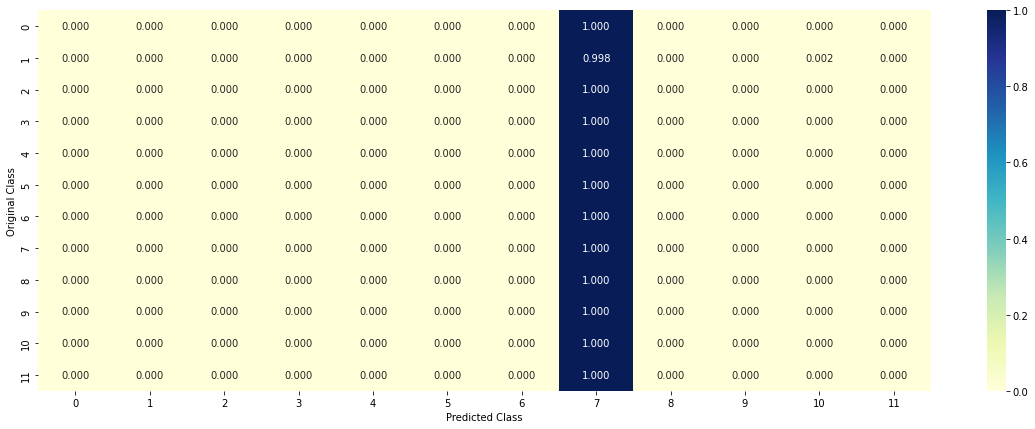

In [27]:
print("Micro f1 score:",round(f1_score(y_test,np.argmax(predict_y,axis=1),average='micro'),3))
print("Macro f1 score:",round(f1_score(y_test,np.argmax(predict_y,axis=1),average='macro'),3))
print("NDCG score:",ndcg_score(encoded_y_test,predict_y,k=5))

plot_confusion_matrix(y_test,np.argmax(predict_y,axis=1))

micro: Calculate metrics globally by counting the total true positives, false negatives and false positives.

macro: Calculate metrics for each label, and find their unweighted mean. This does not take label imbalance into account.

If we look at the macro, it says: This does not take label imbalance into account. So better to use micro if we have an imbalanced data.

## Logistic Regression with class balancing

for alpha = 0.001
Log Loss : 1.0683727529203866
for alpha = 0.01
Log Loss : 1.0669594291084485
for alpha = 0.1
Log Loss : 1.0653611417837716
for alpha = 1
Log Loss : 1.0723930140282985
for alpha = 10
Log Loss : 1.0700597511794911
for alpha = 20
Log Loss : 1.069560511402374
for alpha = 30
Log Loss : 1.0689949835851078
for alpha = 100
Log Loss : 1.0686488840992696


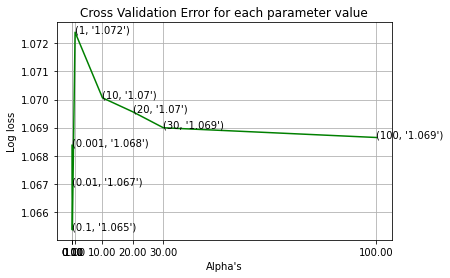

For values of best alpha =  0.1 The train log loss is: 1.2136915946226425
For values of best alpha =  0.1 The cross validation log loss is: 1.0651981840636
For values of best alpha =  0.1 The test log loss is: 1.1138372844848206


In [34]:
alpha = [0.001,0.01, 0.1, 1, 10, 20, 30,100]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i,loss='log',class_weight='balanced')
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.xticks(alpha)
plt.title("Cross Validation Error for each parameter value")
plt.xlabel("Alpha's")
plt.ylabel("Log loss")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
lrb_clf = SGDClassifier(alpha=alpha[best_alpha],loss='log',class_weight='balanced')
lrb_clf.fit(X_train, y_train)
lrb_sig_clf = CalibratedClassifierCV(lrb_clf, method="sigmoid")
lrb_sig_clf.fit(X_train, y_train)


predict_y = lrb_sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = lrb_sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = lrb_sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


Micro f1 score: 0.616
Macro f1 score: 0.064
NDCG score: 0.8223644130646753
-------------------- Confusion matrix --------------------


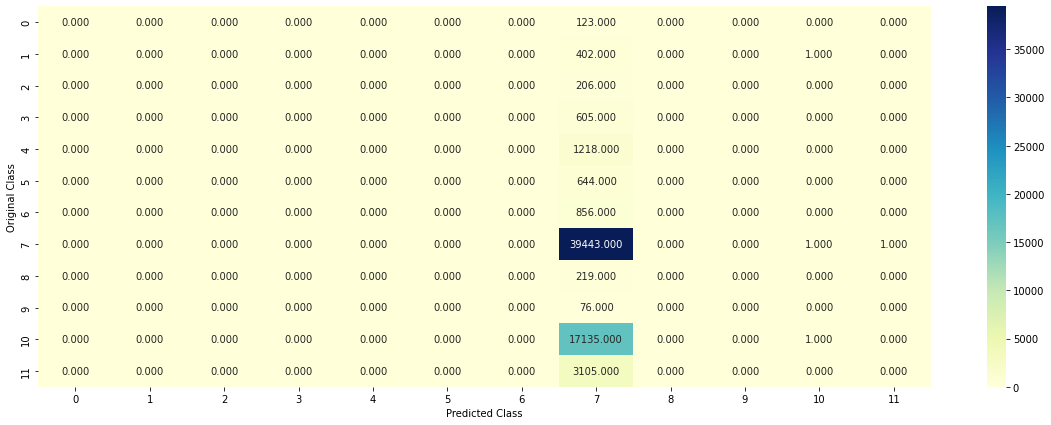

-------------------- Precision matrix (Columm Sum=1) --------------------


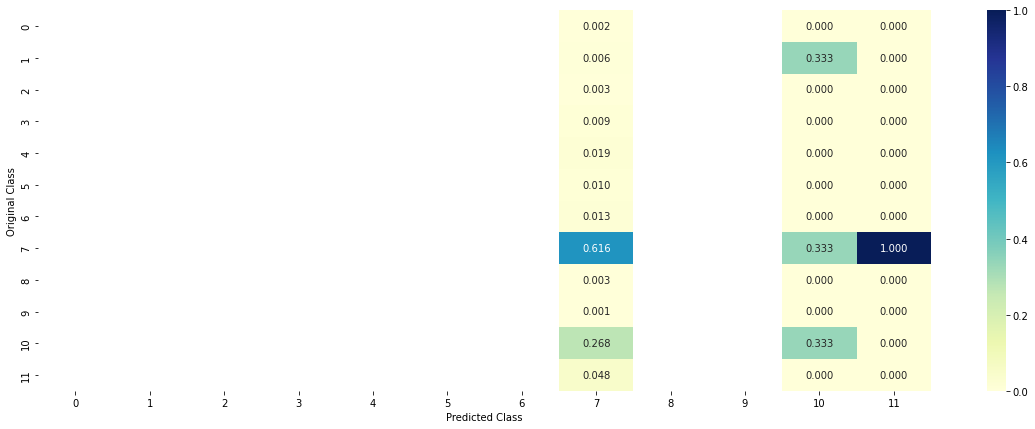

-------------------- Recall matrix (Row sum=1) --------------------


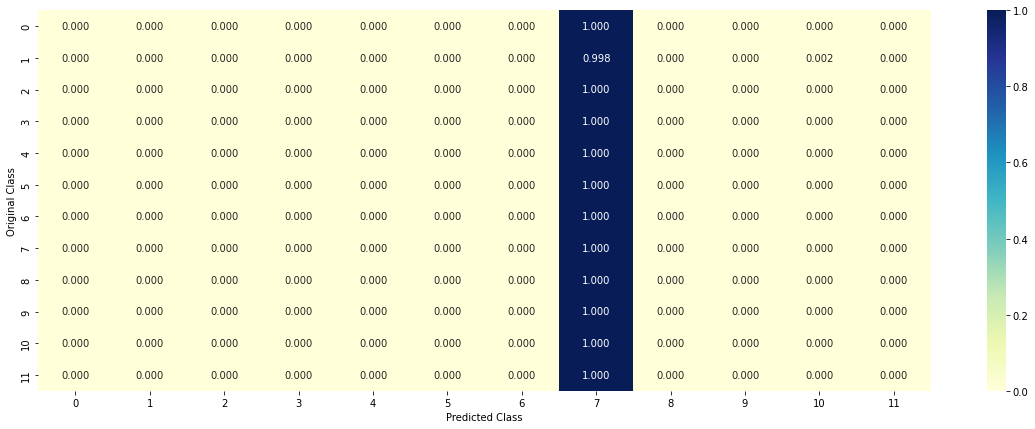

In [35]:
print("Micro f1 score:",round(f1_score(y_test,np.argmax(predict_y,axis=1),average='micro'),3))
print("Macro f1 score:",round(f1_score(y_test,np.argmax(predict_y,axis=1),average='macro'),3))
print("NDCG score:",ndcg_score(encoded_y_test,predict_y,k=5))

plot_confusion_matrix(y_test,np.argmax(predict_y,axis=1))

# Linear SVM

for alpha = 1e-05
Log Loss : 1.0774052444847713
for alpha = 0.0001
Log Loss : 1.0770915562591405
for alpha = 0.001
Log Loss : 1.077250361873056
for alpha = 0.01
Log Loss : 1.0763047772646752
for alpha = 0.1
Log Loss : 1.0728386520999988
for alpha = 1
Log Loss : 1.0652839309826951
for alpha = 10
Log Loss : 1.0704787773790465
for alpha = 100
Log Loss : 1.0685097493557414


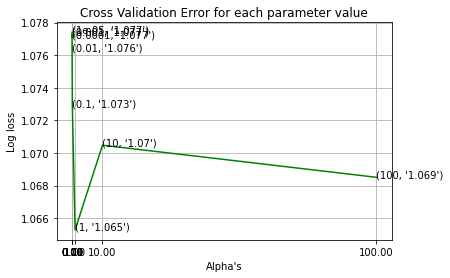

For values of best alpha =  1 The train log loss is: 1.2242034925498606
For values of best alpha =  1 The cross validation log loss is: 1.069571854756147
For values of best alpha =  1 The test log loss is: 1.1105628480053127


In [42]:
alpha = [10**i for i in range(-5,3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i,loss='hinge',class_weight='balanced')
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.xticks(alpha)
plt.title("Cross Validation Error for each parameter value")
plt.xlabel("Alpha's")
plt.ylabel("Log loss")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
svm_clf = SGDClassifier(alpha=alpha[best_alpha],loss='hinge',class_weight='balanced')
svm_clf.fit(X_train, y_train)
svm_sig_clf = CalibratedClassifierCV(svm_clf, method="sigmoid")
svm_sig_clf.fit(X_train, y_train)


predict_y = svm_sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = svm_sig_clf.predict_proba(X_cv)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = svm_sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


Micro f1 score: 0.616
Macro f1 score: 0.064
NDCG score: 0.8222908476955849
-------------------- Confusion matrix --------------------


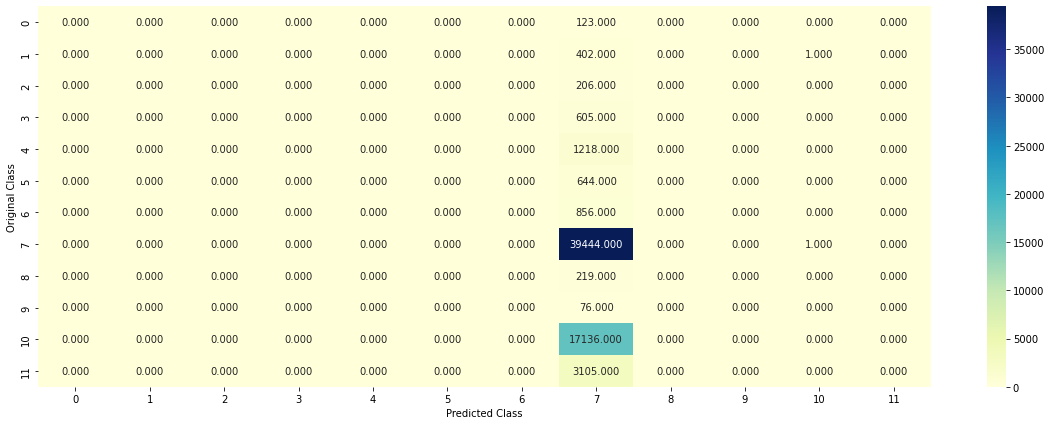

-------------------- Precision matrix (Columm Sum=1) --------------------


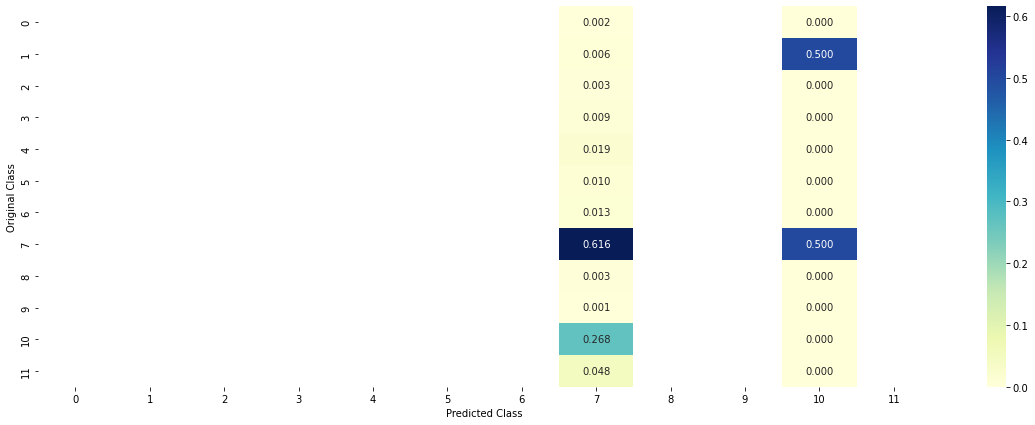

-------------------- Recall matrix (Row sum=1) --------------------


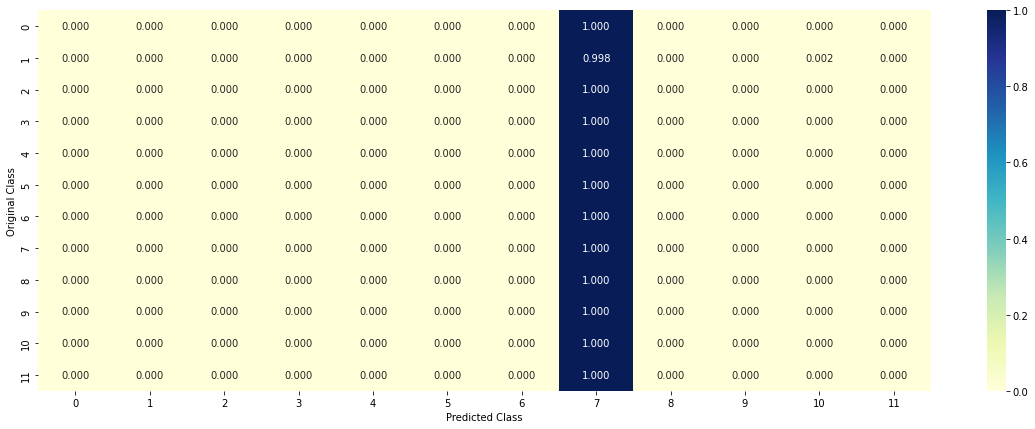

In [43]:
print("Micro f1 score:",round(f1_score(y_test,np.argmax(predict_y,axis=1),average='micro'),3))
print("Macro f1 score:",round(f1_score(y_test,np.argmax(predict_y,axis=1),average='macro'),3))
print("NDCG score:",ndcg_score(encoded_y_test,predict_y,k=5))

plot_confusion_matrix(y_test,np.argmax(predict_y,axis=1))

# Decision Trees

for max_depth = 2
Log Loss : 1.0778049711722482
for max_depth = 3
Log Loss : 1.0718952519542129
for max_depth = 5
Log Loss : 1.0795924022246732
for max_depth = 7
Log Loss : 1.0880292068642137
for max_depth = 10
Log Loss : 1.0922917699637296


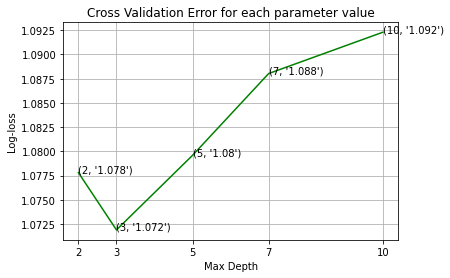

For values of best max_depth =  3 The train log loss is: 1.222464968679697
For values of best max_depth =  3 The cross validation log loss is: 1.0718952519542129
For values of best max_depth =  3 The test log loss is: 1.1180541633464578


In [52]:
max_depth = [2,3,5,7,10]
cv_log_error_array = []
for i in max_depth:
    print("for max_depth =", i)
    clf = DecisionTreeClassifier(max_depth=i,criterion='gini')
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    sig_clf_probs = sig_clf.predict_proba(X_cv)
    cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(max_depth, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((max_depth[i],str(txt)), (max_depth[i],cv_log_error_array[i]))
plt.grid()
plt.xticks(max_depth)
plt.title("Cross Validation Error for each parameter value")
plt.xlabel("Max Depth")
plt.ylabel("Log-loss")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
dt_clf = DecisionTreeClassifier(max_depth=max_depth[best_alpha],criterion='gini')
dt_sig_clf = CalibratedClassifierCV(dt_clf, method="sigmoid")
dt_sig_clf.fit(X_train, y_train)


predict_y = dt_sig_clf.predict_proba(X_train)
print('For values of best max_depth = ', max_depth[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = dt_sig_clf.predict_proba(X_cv)
print('For values of best max_depth = ', max_depth[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = dt_sig_clf.predict_proba(X_test)
print('For values of best max_depth = ', max_depth[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


Micro f1 score: 0.616
Macro f1 score: 0.064
NDCG score: 0.8222379578815413
-------------------- Confusion matrix --------------------


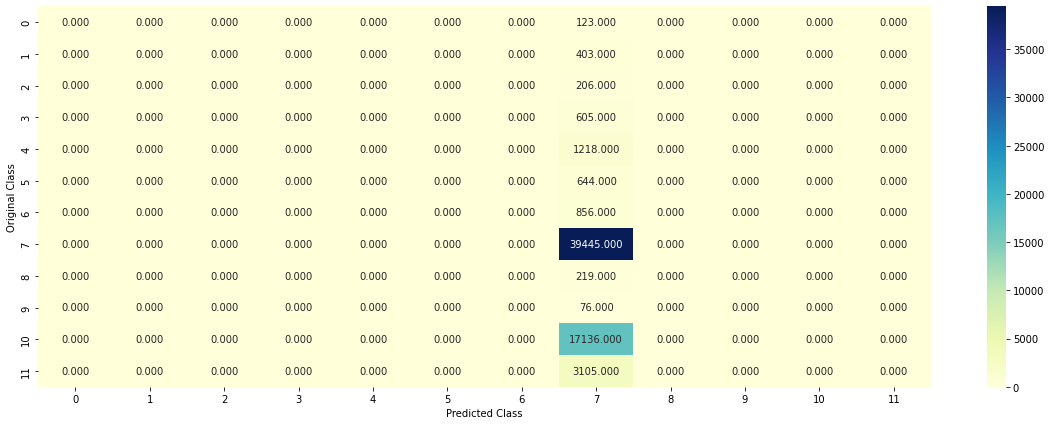

-------------------- Precision matrix (Columm Sum=1) --------------------


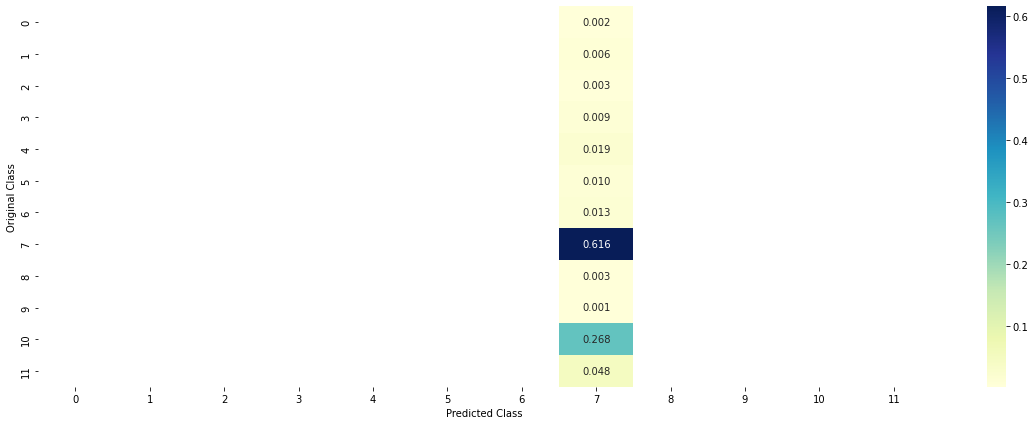

-------------------- Recall matrix (Row sum=1) --------------------


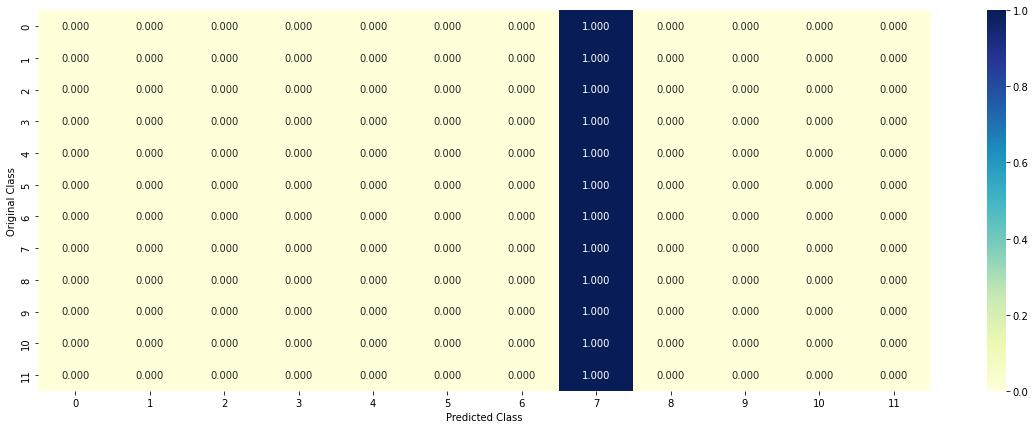

In [53]:
print("Micro f1 score:",round(f1_score(y_test,np.argmax(predict_y,axis=1),average='micro'),3))
print("Macro f1 score:",round(f1_score(y_test,np.argmax(predict_y,axis=1),average='macro'),3))
print("NDCG score:",ndcg_score(encoded_y_test,predict_y,k=5))

plot_confusion_matrix(y_test,np.argmax(predict_y,axis=1))

# Random Forest

In [60]:
alpha = [50, 100, 200, 500, 1000]
max_depth = [3, 5, 7, 10]
cv_log_error_array = []
params=[]
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        params.append((i,j))
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(X_train, y_train)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(X_train, y_train)
        sig_clf_probs = sig_clf.predict_proba(X_cv)
        cv_log_error_array.append(log_loss(y_cv, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(y_cv, sig_clf_probs)) 
        
        
best_alpha = np.argmin(cv_log_error_array)
rf_clf = RandomForestClassifier(n_estimators=params[best_alpha][0], criterion='gini', max_depth=params[best_alpha][1], random_state=42, n_jobs=-1)
rf_clf.fit(X_train, y_train)
rf_sig_clf = CalibratedClassifierCV(rf_clf, method="sigmoid")
rf_sig_clf.fit(X_train, y_train)

predict_y = rf_sig_clf.predict_proba(X_train)
print('For values of best estimator: no_of_estimators=',params[best_alpha][0],',max_depth=',params[best_alpha][1], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = rf_sig_clf.predict_proba(X_cv)
print('For values of best estimator: no_of_estimators=',params[best_alpha][0],',max_depth=',params[best_alpha][1], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = rf_sig_clf.predict_proba(X_test)
print('For values of best estimator: no_of_estimators=',params[best_alpha][0],',max_depth=',params[best_alpha][1], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 50 and max depth =  3
Log Loss : 1.0752709570640306
for n_estimators = 50 and max depth =  5
Log Loss : 1.0780479228709807
for n_estimators = 50 and max depth =  7
Log Loss : 1.07899974455419
for n_estimators = 50 and max depth =  10
Log Loss : 1.0839520238609812
for n_estimators = 100 and max depth =  3
Log Loss : 1.0745016712545497
for n_estimators = 100 and max depth =  5
Log Loss : 1.0789589561921415
for n_estimators = 100 and max depth =  7
Log Loss : 1.0795104735815746
for n_estimators = 100 and max depth =  10
Log Loss : 1.083609014672237
for n_estimators = 200 and max depth =  3
Log Loss : 1.075293520148768
for n_estimators = 200 and max depth =  5
Log Loss : 1.0789105692586864
for n_estimators = 200 and max depth =  7
Log Loss : 1.0800781139863127
for n_estimators = 200 and max depth =  10
Log Loss : 1.0830930434475556
for n_estimators = 500 and max depth =  3
Log Loss : 1.076753866024662
for n_estimators = 500 and max depth =  5


KeyboardInterrupt: 

Micro f1 score: 0.616
Macro f1 score: 0.064
NDCG score: 0.8223257260349836
-------------------- Confusion matrix --------------------


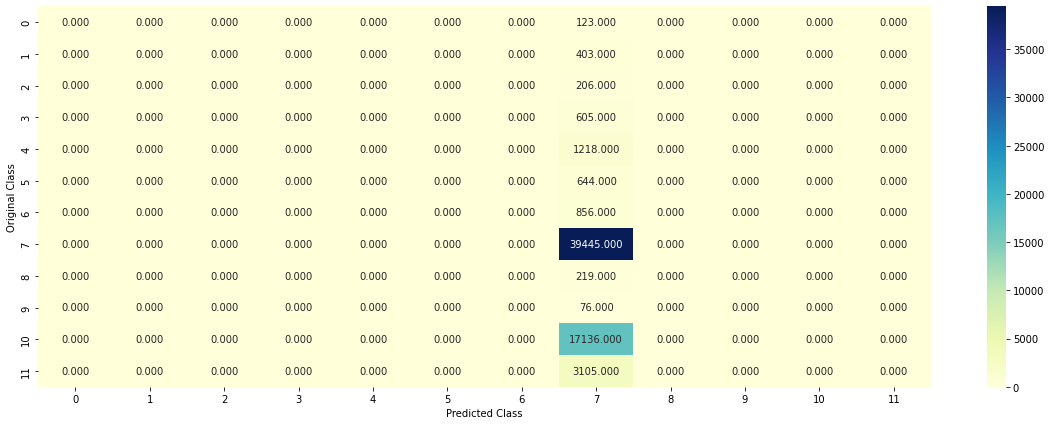

-------------------- Precision matrix (Columm Sum=1) --------------------


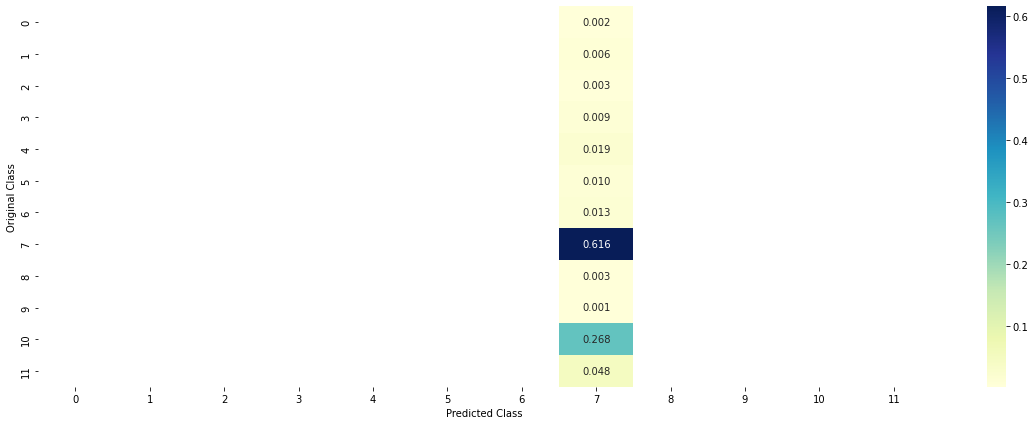

-------------------- Recall matrix (Row sum=1) --------------------


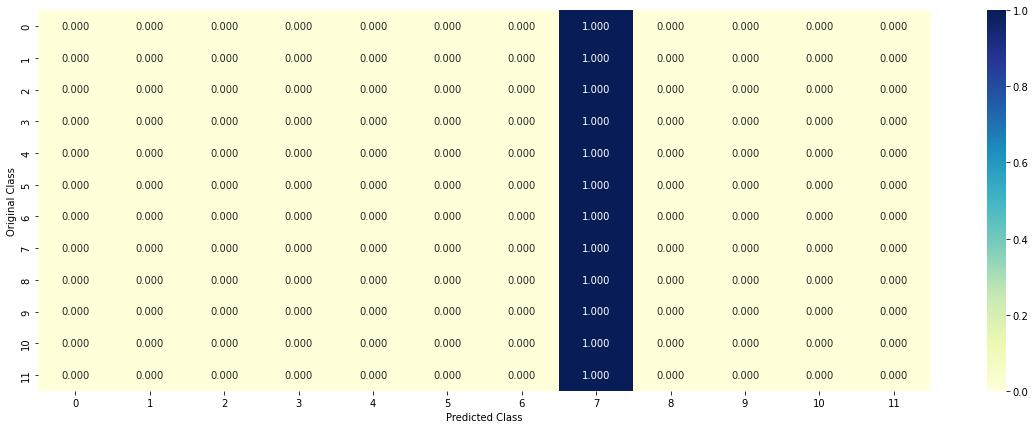

In [258]:
print("Micro f1 score:",round(f1_score(y_test,np.argmax(predict_y,axis=1),average='micro'),3))
print("Macro f1 score:",round(f1_score(y_test,np.argmax(predict_y,axis=1),average='macro'),3))
print("NDCG score:",ndcg_score(encoded_y_test,predict_y,k=5))

plot_confusion_matrix(y_test,np.argmax(predict_y,axis=1))


# Xgboost

In [330]:
train_x=np.vstack((X_train,X_cv))
train_y=np.concatenate((y_train.values,y_cv.values),axis=0)

In [334]:
xgb_clf=XGBClassifier(random_state=10,n_jobs=-1)

param_dist = {"n_estimators":sp_randint(100,500),
              "learning_rate":sp_randint(0.001,10),
              "max_depth": sp_randint(1,5),
              "booster":['gbtree','gblinear'],
              "colsample_bytree":sp_randint(0.5,1),
              "colsample_bylevel":sp_randint(0.5,1),
              "reg_alpha":sp_randint(0.001,10),
              "reg_lambda":sp_randint(0.001,10)
              }


xgb_random = RandomizedSearchCV(xgb_clf, param_distributions=param_dist, 
                                   n_iter=5,cv=10,scoring='f1',random_state=10,return_train_score=True)

xgb_random.fit(train_x,train_y,eval_metric='logloss')

print("Best Parameters of Xgb Classifier:-")
print(xgb_random.best_estimator_)

[11:23:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:42:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:58:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/s

[16:31:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[16:48:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[17:23:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/s

In [336]:
xgb_clf=XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=0,
              colsample_bynode=None, colsample_bytree=0,
              enable_categorical=False, gamma=None, gpu_id=-1,
              importance_type=None, interaction_constraints=None,
              learning_rate=4, max_delta_step=None, max_depth=4,
              min_child_weight=None, monotone_constraints=None,
              n_estimators=420, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, random_state=10,
              reg_alpha=1, reg_lambda=9, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=1, verbosity=None)

xgb_clf.fit(X_train,y_train)
xgb_sig_clf = CalibratedClassifierCV(xgb_clf, method="sigmoid")
xgb_sig_clf.fit(X_train, y_train)

predict_y = xgb_sig_clf.predict_proba(X_train)
print("For best parameters, the train log-loss is:",log_loss(y_train,predict_y))
predict_y = xgb_sig_clf.predict_proba(X_cv)
print("For best parameters, the train log-loss is:",log_loss(y_cv,predict_y))
predict_y = xgb_sig_clf.predict_proba(X_test)
print("For best parameters, the train log-loss is:",log_loss(y_test,predict_y))

[20:44:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:44:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:57:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "max_depth" } might not be used.

  This could be a false alarm, with som

Micro f1 score: 0.616
Macro f1 score: 0.064
NDCG score: 0.8224252343670225
-------------------- Confusion matrix --------------------


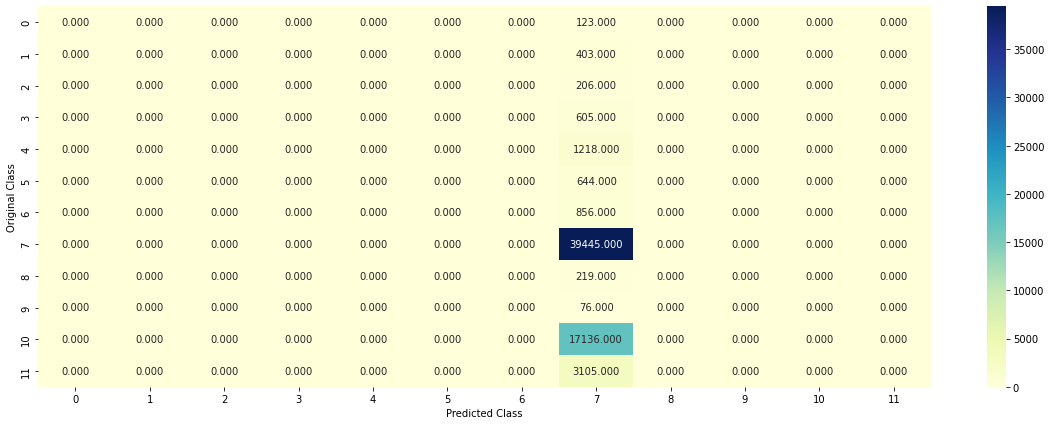

-------------------- Precision matrix (Columm Sum=1) --------------------


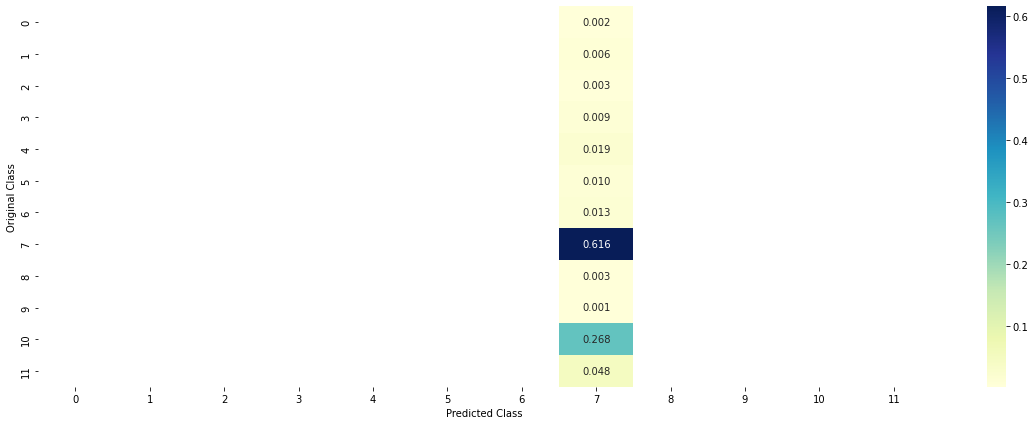

-------------------- Recall matrix (Row sum=1) --------------------


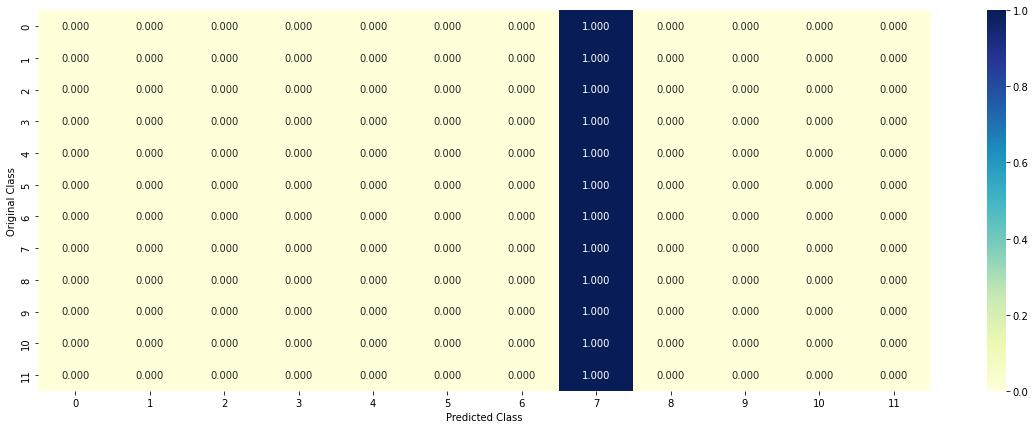

In [337]:
print("Micro f1 score:",round(f1_score(y_test,np.argmax(predict_y,axis=1),average='micro'),3))
print("Macro f1 score:",round(f1_score(y_test,np.argmax(predict_y,axis=1),average='macro'),3))
print("NDCG score:",ndcg_score(encoded_y_test,predict_y,k=5))

plot_confusion_matrix(y_test,np.argmax(predict_y,axis=1))

## Stacking Classifier

In [342]:
clf1 = SGDClassifier(alpha=0.1, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(X_train,y_train)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=100, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(X_train,y_train)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")

clf3 = DecisionTreeClassifier(max_depth=3)
clf3.fit(X_train,y_train)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

clf4 = RandomForestClassifier(max_depth=3,n_estimators=50)
clf4.fit(X_train,y_train)
sig_clf4 = CalibratedClassifierCV(clf4, method="sigmoid")


sig_clf1.fit(X_train,y_train)
print("Logistic Regression :  Log Loss: %0.3f" % (log_loss(y_cv, sig_clf1.predict_proba(X_cv))))
sig_clf2.fit(X_train,y_train)
print("Support vector machines : Log Loss: %0.3f" % (log_loss(y_cv, sig_clf2.predict_proba(X_cv))))
sig_clf3.fit(X_train,y_train)
print("Decision Tree : Log Loss: %0.3f" % (log_loss(y_cv, sig_clf3.predict_proba(X_cv))))
sig_clf4.fit(X_train,y_train)
print("Random Forest : Log Loss: %0.3f" % (log_loss(y_cv, sig_clf4.predict_proba(X_cv))))
print("-"*50)

alpha = [0.001,0.01,0.1,1,10] 
log_error=[]
estimators=[('lr',sig_clf1),('svm',sig_clf2),('dt',sig_clf3),('rf',sig_clf4)]

for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(estimators=estimators, final_estimator=lr)
    sclf.fit(X_train,y_train)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(y_cv, sclf.predict_proba(X_cv))))
    log_error.append(log_loss(y_cv, sclf.predict_proba(X_cv)))

best_alpha=alpha[np.argmin(log_error)]

lr = LogisticRegression(C=best_alpha)
sclf = StackingClassifier(estimators=estimators, final_estimator=lr)
sclf.fit(X_train,y_train)

log_error = log_loss(y_train, sclf.predict_proba(X_train))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(y_cv, sclf.predict_proba(X_cv))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(y_test, sclf.predict_proba(X_test))
print("Log loss (test) on the stacking classifier :",log_error)


Logistic Regression :  Log Loss: 1.065
Support vector machines : Log Loss: 1.068
Decision Tree : Log Loss: 1.072
Random Forest : Log Loss: 1.076
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 1.075
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.064
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.058
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.056
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 1.053
Log loss (train) on the stacking classifier : 1.210845888627926
Log loss (CV) on the stacking classifier : 1.0535018910363236
Log loss (test) on the stacking classifier : 1.1039634960875182


Micro f1 score: 0.616
Macro f1 score: 0.064
NDCG score: 0.8223995235646884
-------------------- Confusion matrix --------------------


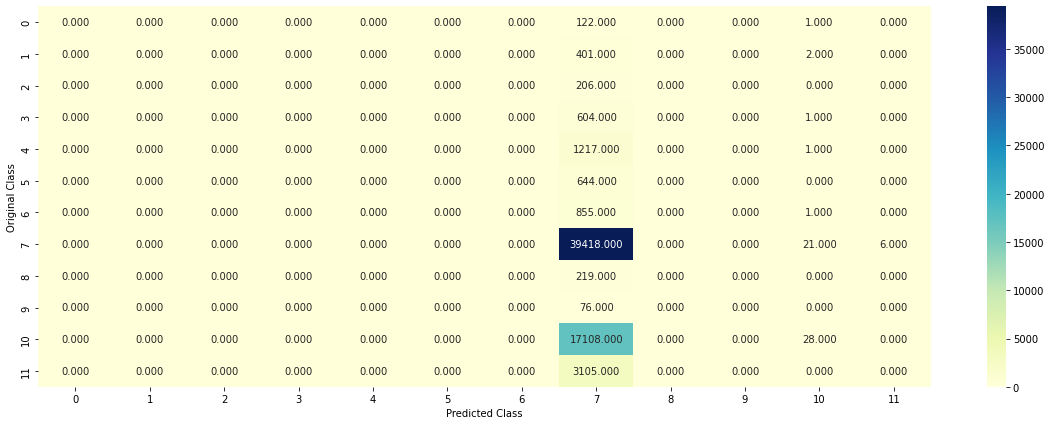

-------------------- Precision matrix (Columm Sum=1) --------------------


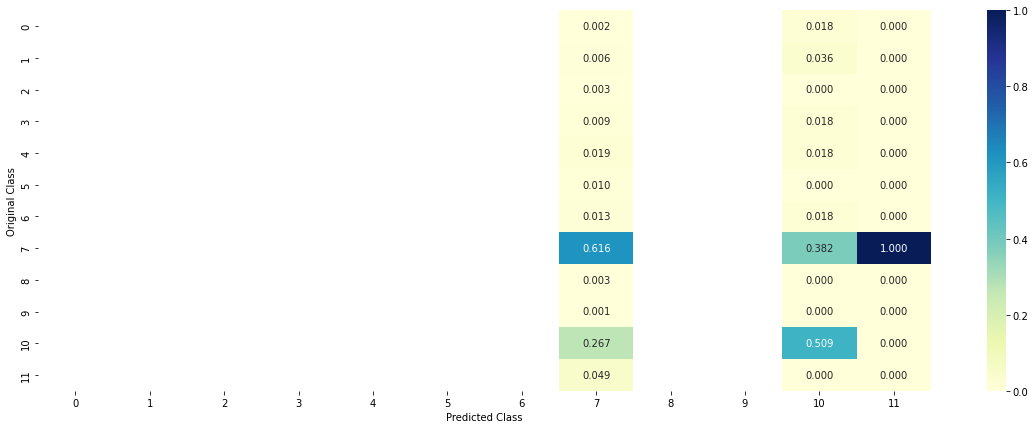

-------------------- Recall matrix (Row sum=1) --------------------


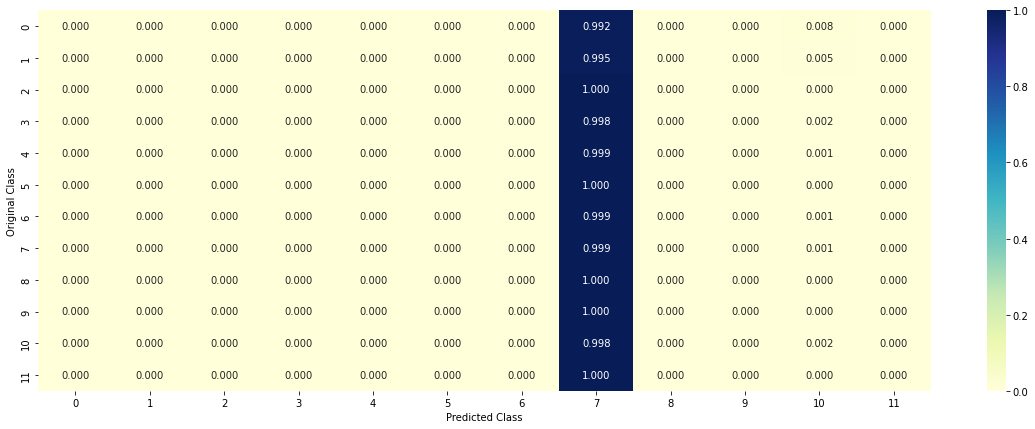

In [344]:
print("Micro f1 score:",round(f1_score(y_test,np.argmax(sclf.predict_proba(X_test),axis=1),average='micro'),3))
print("Macro f1 score:",round(f1_score(y_test,np.argmax(sclf.predict_proba(X_test),axis=1),average='macro'),3))
print("NDCG score:",ndcg_score(encoded_y_test,sclf.predict_proba(X_test),k=5))

plot_confusion_matrix(y_test,np.argmax(sclf.predict_proba(X_test),axis=1))

# Comparison of Models

In [345]:
myTable=PrettyTable(['Models','Log-loss','NDCG score'])

myTable.add_row(['Logistic Regression without class balancing',1.1113,0.82230])
myTable.add_row(['Logistic Regression with class balancing',1.1119,0.82234])
myTable.add_row(['Linear SVM',1.1125,0.82226])
myTable.add_row(['Decision Tree',1.1180,0.82223])
myTable.add_row(['Random Forest',1.1175,0.82223])
myTable.add_row(['Xgboost',1.1235,0.82242])
myTable.add_row(['Stacking Classifier',1.1039,0.82239])

print(myTable)

+---------------------------------------------+----------+------------+
|                    Models                   | Log-loss | NDCG score |
+---------------------------------------------+----------+------------+
| Logistic Regression without class balancing |  1.1113  |   0.8223   |
|   Logistic Regression with class balancing  |  1.1119  |  0.82234   |
|                  Linear SVM                 |  1.1125  |  0.82226   |
|                Decision Tree                |  1.118   |  0.82223   |
|                Random Forest                |  1.1175  |  0.82223   |
|                   Xgboost                   |  1.1235  |  0.82242   |
|             Stacking Classifier             |  1.1039  |  0.82239   |
+---------------------------------------------+----------+------------+


# Predicting for the given test dataset
* Here we are predicting using the linear SVM classifier since it is giving the highest kaggle score in the leaderboard

In [61]:
#predictions
test_y_predict=svm_sig_clf.predict_proba(test)

In [62]:
#getting the top 5 countries based on probability scores
id=[]
country=[]
for i in range(len(test_df.id.values)):
    country.extend(np.argsort(test_y_predict[i])[-1:-6:-1])
    for j in range(5):
        id.append(test_df.id.values[i])
    

In [63]:
#getting the dataframe
predicted_df=pd.DataFrame({'id':id,'country':country})
predicted_df.head(15)

,id,country
0,5uwns89zht,7
1,5uwns89zht,10
2,5uwns89zht,11
3,5uwns89zht,4
4,5uwns89zht,3
5,jtl0dijy2j,7
6,jtl0dijy2j,10
7,jtl0dijy2j,11
8,jtl0dijy2j,4
9,jtl0dijy2j,3


In [64]:
#getting the destination country names by label encoder object
predicted_df.country=le.inverse_transform(predicted_df.country)

In [65]:
predicted_df

,id,country
0,5uwns89zht,NDF
1,5uwns89zht,US
2,5uwns89zht,other
3,5uwns89zht,FR
4,5uwns89zht,ES
...,...,...
310475,9uqfg8txu3,NDF
310476,9uqfg8txu3,US
310477,9uqfg8txu3,other
310478,9uqfg8txu3,FR


In [66]:
#saving the output file in csv format
predicted_df.to_csv('18_output.csv',index=False)

# Custom ensembler classifier

### Steps:


Custom Stacking classifier:

a) Split your whole data into train and test(80-20)

b) Now, in the 80% train set, split the train set into D1 and D2.(50-50).

From this D1, do sampling with replacement to create d1,d2,d3....dk(k samples).

Now create 'k' models and train each of these models with the samples. Each model will be trained on only one sample. These models are called base models. We can select the best models and its hyperparameters based on the previous findings. Make sure that ‘k’ can be passed as an argument.

c) Now pass the D2 set to each of these k models; now, you will get k predictions for D2 from each of these models.

d) Now, using these k predictions, create a new dataset, for D2, you already know it's corresponding target values, so now you train a metamodel with these k predictions.

e) Now, for model evaluation, you can use the 20% data that you have kept as the test set. Pass that test set to each of the base models, and you will get 'k' predictions. Now you create a new dataset with these k predictions and pass it to your metamodel, and you will get the final prediction. Using this final prediction and the targets for the test set, you can calculate the model's performance score.


<b>Spliting the whole data into train and test(80-20)

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("X_train shape:",X_train.shape)
print("X_test shape:",X_test.shape)

X_train shape: (170760, 346)
X_test shape: (42691, 346)


In [17]:
#standardising
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Custom Ensembler function

<b> Function for just training the base models and predicting using the meta classifier

In [44]:
def custom_ensembler(X_train,y_train,X_test,n_estimators,models):
    
    #splitting the data into D1 and D2 datasets (50-50 proportion)
    D1,D2,D1_y,D2_y=train_test_split(X_train,y_train,test_size=0.5,random_state=42)
    
    D1=pd.DataFrame(np.hstack((D1,D1_y.values.reshape(-1,1))))
    
    trained_models=[]
    
    print("Training the base models...\n")        #training the base models 
    for i in range(n_estimators):
        
        #getting the samples with replacement
        d=D1.sample(n=len(D1),replace=True,random_state=np.random.randint(1,100))
        d_y=d.iloc[:,-1]
        d=d.iloc[:,:-1]
        
        #fitting the base model and then fitting a calibrated classifier since we want probabilities
        models[i].fit(d,d_y)
        sig_clf = CalibratedClassifierCV(models[i], method="sigmoid")
        sig_clf.fit(d, d_y)
        
        #prediciting using the trained base model for the sample we created
        predict_y=sig_clf.predict_proba(d)
        print("The train log loss for model ",i,": ",log_loss(d_y, predict_y, eps=1e-15))
        print("--"*30)
        
        #predicting for D2 dataset
        predictions_D2=sig_clf.predict_proba(pd.DataFrame(D2))
        
        
        #stacking the predictions for D2 dataset that we get using the trained base models to create another dataset
        if i==0:
            predictions_D2_array=predictions_D2
            
        else:
            predictions_D2_array=np.hstack((predictions_D2_array,predictions_D2))
        
        #getting the trained moels in a list
        trained_models.append(sig_clf)
            
        
    predictions_D2_df=pd.DataFrame(predictions_D2_array)
    
    
    
    print("\nTraining the meta classifier...")    #training the meta classifier

    meta_clf = SGDClassifier(alpha=1,loss='log',class_weight='balanced')   #using logistic regression as meta model
    meta_clf.fit(predictions_D2_df, D2_y)
    meta_sig_clf = CalibratedClassifierCV(meta_clf, method="sigmoid")
    meta_sig_clf.fit(predictions_D2_df, D2_y)

    #predicting using the meta model
    predict_D2_y = meta_sig_clf.predict_proba(predictions_D2_df)
    print("\nThe log loss is:",log_loss(D2_y, predict_D2_y, eps=1e-15))    
    
    
    
    #predictions for test dataset using the trained base models so that to create a new dataset
    for i in range(n_estimators):
        
        predictions_test=trained_models[i].predict_proba(pd.DataFrame(X_test))
        
        if i==0:
            predictions_test_array=predictions_test
            
        else:
            predictions_test_array=np.hstack((predictions_test_array,predictions_test))
        
    
    #predictions for test dataset using the meta model
    predict_test_y=meta_sig_clf.predict_proba(predictions_test_array)
    
    
    return predict_test_y,trained_models,meta_sig_clf

<b> Function for just predicting using the final custom classifier

In [51]:
def predict(X_test,trained_models,meta_model):
    
    
    #predictions for test dataset using the trained base models so that to create a new dataset
    for i in range(len(trained_models)):
        
        predictions_test=trained_models[i].predict_proba(pd.DataFrame(X_test))
        
        if i==0:
            predictions_test_array=predictions_test
            
        else:
            predictions_test_array=np.hstack((predictions_test_array,predictions_test))
    
    
    #predictions for test dataset using the meta model
    predict_test_y=meta_model.predict_proba(predictions_test_array)
    
    return predict_test_y

In [42]:
#encoding the class labels of test dataset for NDCG score

encoded_y_test=np.zeros((len(y_test.values),12))
encoded_y_test.shape

c=0
for i in y_test.values:
    encoded_y_test[c][i]=1
    c+=1
    
print("The class for 1st test datapoint:",y_test.values[0])
print("The corresponding encoded class:",encoded_y_test[0])

The class for 1st test datapoint: 7
The corresponding encoded class: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


<b> Here we will be using a combination of 6 base models:
1. Logistic regression (without class balancing)
2. Logistic regression (with class balancing)
3. Linear SVM
4. Decision Tree
5. Random Forest
6. Xgboost

<b> Calling the custom_ensembler function

In [45]:
n_estimators=6

models=[SGDClassifier(alpha=0.1,loss='log'),SGDClassifier(alpha=0.1,loss='log',class_weight='balanced'),\
       SGDClassifier(alpha=1,loss='hinge',class_weight='balanced'),DecisionTreeClassifier(max_depth=3,criterion='gini'),\
       RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=3, random_state=42, n_jobs=-1),\
       XGBClassifier(base_score=0.5, booster='gblinear', colsample_bylevel=0,
              colsample_bynode=None, colsample_bytree=0,
              enable_categorical=False, gamma=None, gpu_id=-1,
              importance_type=None, interaction_constraints=None,
              learning_rate=4, max_delta_step=None, max_depth=4,
              min_child_weight=None, monotone_constraints=None,
              n_estimators=420, n_jobs=-1, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, random_state=10,
              reg_alpha=1, reg_lambda=9, scale_pos_weight=None, subsample=None,
              tree_method=None, validate_parameters=1, verbosity=None)]


predict_test_y,trained_models,meta_model=custom_ensembler(X_train,y_train,X_test,n_estimators,models)

print("The test log loss is:",log_loss(y_test, predict_test_y, eps=1e-15))

Training the base models...

The train log loss for model  0 :  1.1124994599191587
------------------------------------------------------------
The train log loss for model  1 :  1.1066359655554756
------------------------------------------------------------
The train log loss for model  2 :  1.134523985307261
------------------------------------------------------------
The train log loss for model  3 :  1.1313066837389205
------------------------------------------------------------
The train log loss for model  4 :  1.1200487686605267
------------------------------------------------------------
[10:21:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bylevel", "colsample_bytree", "max_depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wro

Micro f1 score: 0.593
Macro f1 score: 0.075
NDCG score: 0.8088031894604936
-------------------- Confusion matrix --------------------


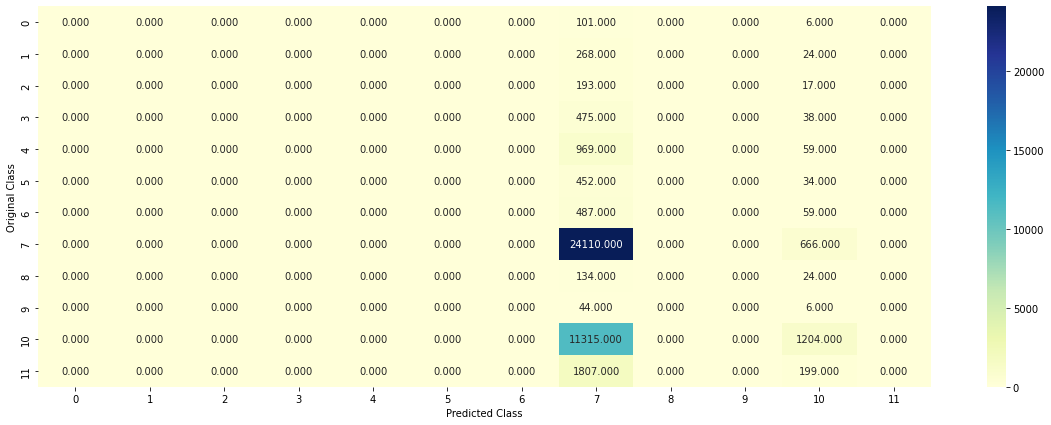

-------------------- Precision matrix (Columm Sum=1) --------------------


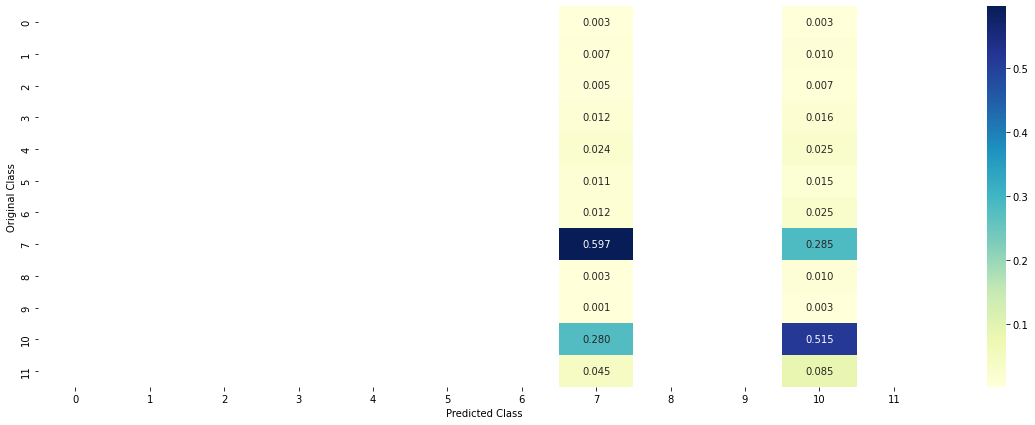

-------------------- Recall matrix (Row sum=1) --------------------


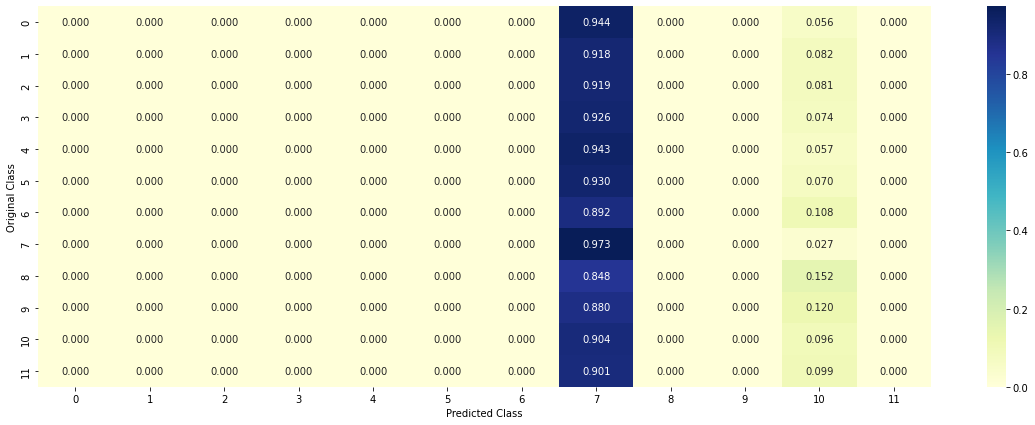

In [46]:
print("Micro f1 score:",round(f1_score(y_test,np.argmax(predict_test_y,axis=1),average='micro'),3))
print("Macro f1 score:",round(f1_score(y_test,np.argmax(predict_test_y,axis=1),average='macro'),3))
print("NDCG score:",ndcg_score(encoded_y_test,predict_test_y,k=5))

plot_confusion_matrix(y_test,np.argmax(predict_test_y,axis=1))

<b> Saving the trained base models and the meta classifier

In [48]:
import pickle
with open('ce_meta_model', 'wb') as files:
    pickle.dump(meta_model, files)
    
for i in range(len(trained_models)):
    with open('ce_model_'+str(i),'wb') as files:
        pickle.dump(trained_models[i],files)

## Predicting for the final dataset provided for the competition

In [49]:
#Standardising the given  dataset
test=sc.transform(encoded_test_df)

<b> Predictions using the meta classifier

In [52]:
final_predict_test_y=predict(test,trained_models,meta_model)

In [53]:
#getting the top 5 countries based on probability scores
id=[]
country=[]
for i in range(len(test_df.id.values)):
    country.extend(np.argsort(final_predict_test_y[i])[-1:-6:-1])
    for j in range(5):
        id.append(test_df.id.values[i])
    

In [54]:
#getting the dataframe
predicted_df=pd.DataFrame({'id':id,'country':country})
predicted_df.head(15)

,id,country
0,5uwns89zht,7
1,5uwns89zht,10
2,5uwns89zht,11
3,5uwns89zht,4
4,5uwns89zht,6
5,jtl0dijy2j,7
6,jtl0dijy2j,10
7,jtl0dijy2j,11
8,jtl0dijy2j,4
9,jtl0dijy2j,6


In [55]:
#getting the destination country names by label encoder object
predicted_df.country=le.inverse_transform(predicted_df.country)

In [56]:
predicted_df

,id,country
0,5uwns89zht,NDF
1,5uwns89zht,US
2,5uwns89zht,other
3,5uwns89zht,FR
4,5uwns89zht,IT
...,...,...
310475,9uqfg8txu3,NDF
310476,9uqfg8txu3,US
310477,9uqfg8txu3,other
310478,9uqfg8txu3,FR


In [57]:
#saving the output file in csv format
predicted_df.to_csv('custom_ensembler_output.csv',index=False)

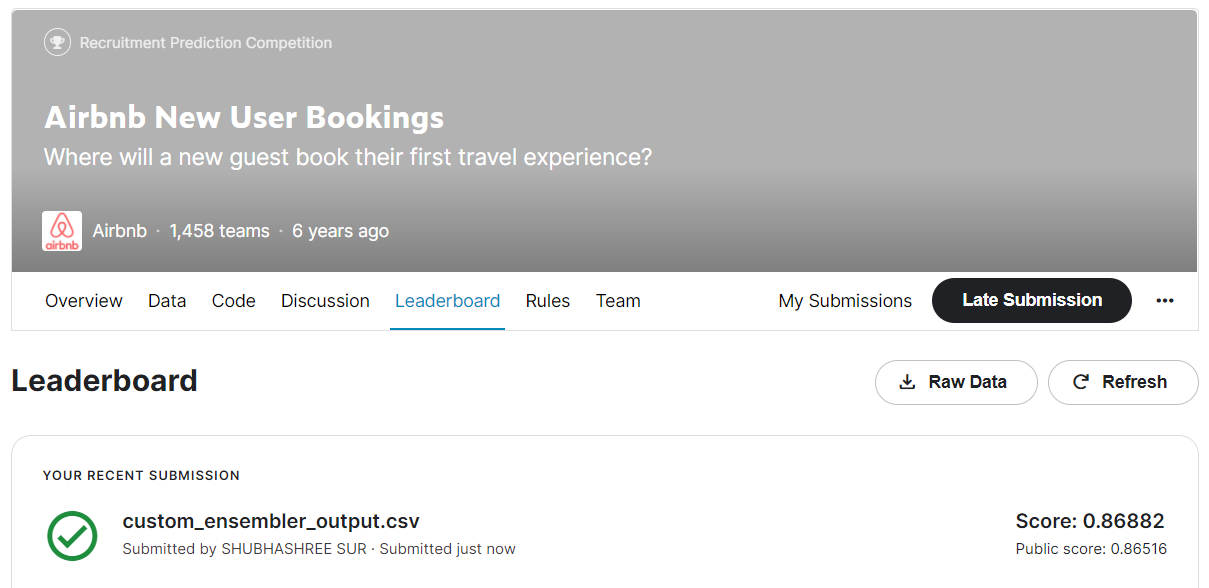